1.Importing Libraries and Dataset

In [56]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

dataset = pd.read_excel("HousePricePrediction.xlsx")

print(dataset.head())

dataset.shape

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


(2919, 13)

2.Data Preprocessing

In [57]:
object_cols = dataset.select_dtypes(include = ['object']).columns
print("Categorical variables:", len(object_cols))

int_ = dataset.select_dtypes(include = ['int64']).columns
print("Integer variables:", len(int_))

fl_cols = dataset.select_dtypes(include =['float64']).columns
print("Float variables:", len(fl_cols))

Categorical variables: 4
Integer variables: 6
Float variables: 3


3.Exploratory Data Analysis

3.1 Numerical Data Analysis

Correlation heatmap saved as 'correlation_heatmap.png'


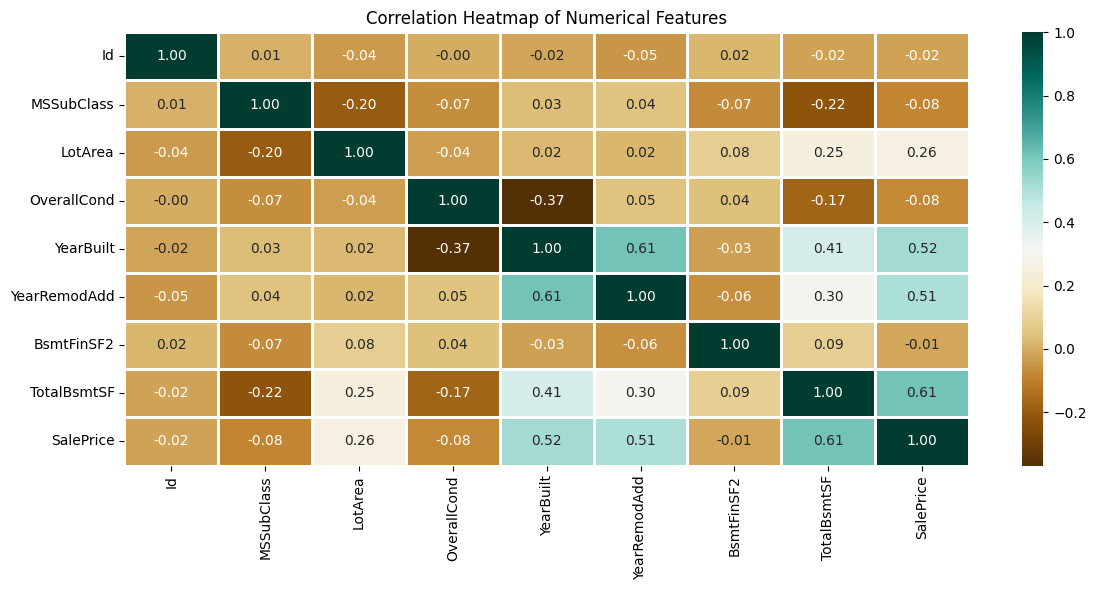

In [58]:
numerical_dataset = dataset.select_dtypes(include =['int64', 'float64'])
plt.figure(figsize=(12,6))
sns.heatmap(numerical_dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
print("Correlation heatmap saved as 'correlation_heatmap.png'")

3.2 Categorical Data Analysis

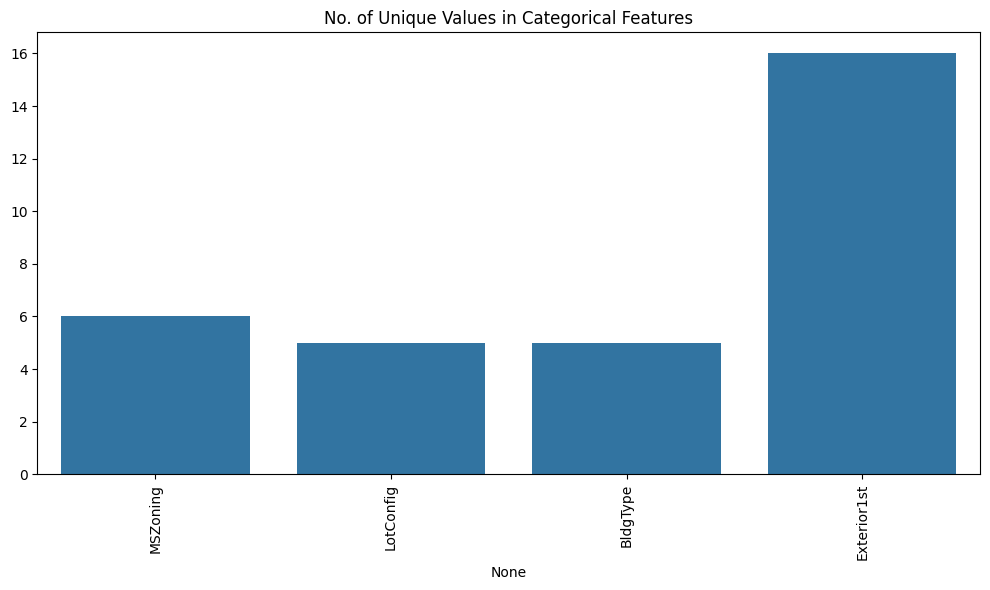

In [59]:
unique_values = []

for col in object_cols:
    unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. of Unique Values in Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols, y=unique_values)
plt.tight_layout()
plt.show()

The above plot shows that Exterior1st has around 16 unique categories and other features have around  6 unique categories. 
To findout the actual count of each category we can plot the bargraph of each four features separately.

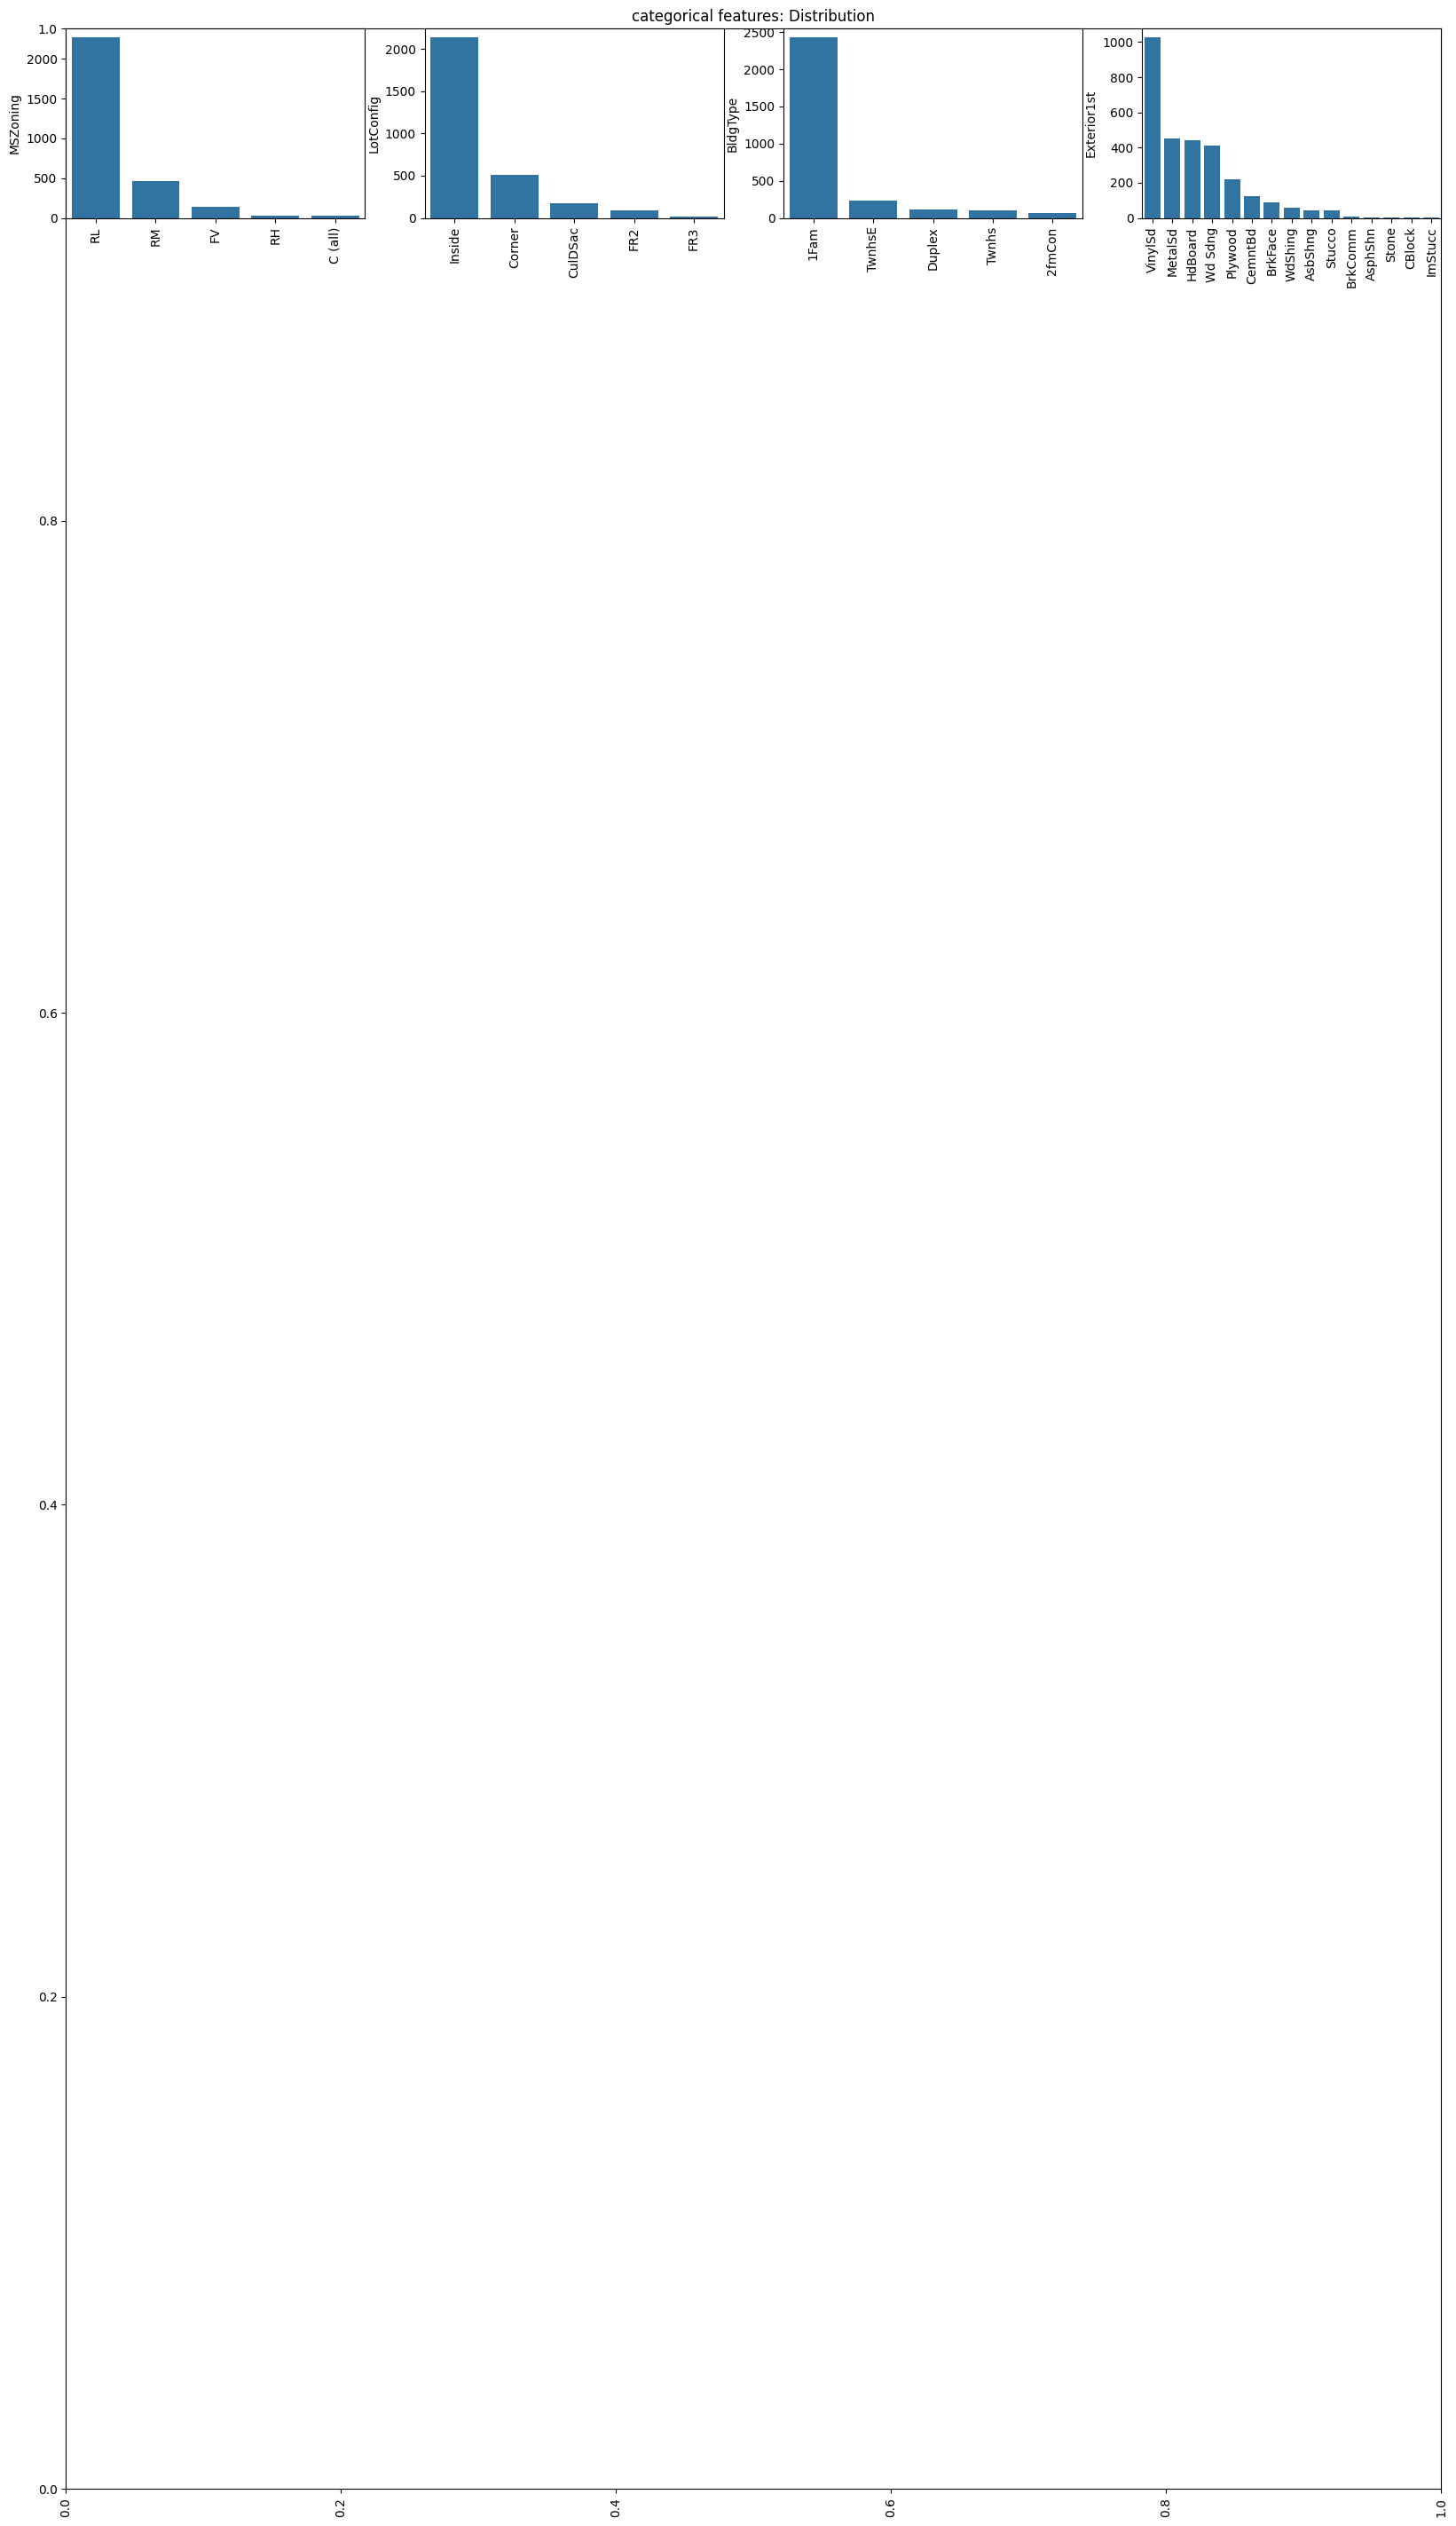

In [60]:
plt.figure(figsize=(20,36))
plt.title('categorical features: Distribution')
plt.xticks(rotation = 90)
index =1

for col in object_cols:
    y=dataset[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    plt.ylabel(col)
    sns.barplot(x=list(y.index),y=(y.values))
    index+=1

4.Data Cleaning

In [61]:
# drop the unwanted column 'Id' from the dataset
dataset.drop(['Id'],
             axis=1,
             inplace=True)

# replace the feature/ouput column 'Saleprice' with mean values
# to make the data distribution symmetric

dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())

#Drop records with null values
new_dataset = dataset.dropna()

#check if there are any null values in the new dataset
print(new_dataset.isnull().sum())

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64


5.OneHotEncoder - to convert categorical data into binary vectors

In [62]:
from sklearn.preprocessing import OneHotEncoder

s= (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print('Categorical Variables:\n',object_cols)
print("\nNo. of Categorical Variables:", len(object_cols)  )

Categorical Variables:
 ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

No. of Categorical Variables: 4


In [64]:
OH_encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols],axis=1)

6: Splitting Dataset into Training and Testing

In [65]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'],axis=1)
Y = df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y,train_size = 0.8,test_size=0.2, random_state=0)


7: Model Training and Accuracy

we will be using these regression models: 
1->SVM-Support Vector Machine 
2->Random Forest Regressor 
3->Linear Regressor

to calculate loss we use mean absolute error

formula: 
$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

7.1. SVM - Support vector Machine 

It works by finding the hyperplane that best divides a dataset into classes. 

In [66]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train, Y_train)
Y_pred = model_SVR.predict(X_valid)

print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(Y_valid, Y_pred))

Mean Absolute Percentage Error: 0.1870512931870423


7.2. Random Forest Regression

Random Forest is an ensemble learning algorithm used for both classification and regression tasks.

The final output is determined by averaging the outputs of individual trees (for regression) or by majority voting (for classification).

In [82]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=1000)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(Y_valid, Y_pred))

Mean Absolute Percentage Error: 0.1858578679763398


7.3. Linear Regression

Linear Regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables. 

The goal is to find the line that best fits the data. This is done by minimizing the sum of the squared differences between the observed and predicted values.

In [83]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(Y_valid, Y_pred))

Mean Absolute Percentage Error: 0.187416838415999
